<a href="https://colab.research.google.com/github/Nathalia-Prada/Sinergia_Bootcamp/blob/main/01_Caso_2_Taxi_trip_fare_prediction/Punto_1_caso_2_Taxi_trip_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 1
1.	Despliegue de modelos de clasificación y regresión utilizando Scikit-Learn, XGBoost y Redes Neuronales

# Caso 2
# Taxi trip fare prediction


### 2024.11.12


- En estos modelos de clasificación y regresión es importante desplegar métodos de hiperparámetros como Grid Search y Random Search
- Es importante realizar un preprocesamiento de los datos y un análisis exploratorio de los datos (al menos 5 visualizaciones claves de cada caso de estudio)
- Para cumplir el punto debe desplegar dos modelos de machine learning (ya sea para clasificación o regresión), uno de redes neuronales y uno de xgboost para cada caso de estudio.


## Download the dataframe from Kaggle
Install the kaggle python library

In [1]:
!pip install --user kaggle

Mount the Google drive so you can store your kaggle API credentials for future use

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import os

# Define the dataset file path
# Este es el nombre del file que estamos explorando en kaggle:
FILE = "raviiloveyou/predict-taxi-fare-with-a-bigquery-ml-forecasting"

Make a directory for kaggle at the temporary instance location on Colab drive.

Download your kaggle API key (.json file). You can do this by going to your kaggle account page and clicking 'Create new API token' under the API section.

In [4]:
! mkdir ~/.kaggle

Upload the json file to Google Drive and then copy to the temporary location.

In [5]:
!cp /content/drive/MyDrive/Bootcamp/kaggle.json ~/.kaggle/kaggle.json

Change the file permissions to read/write to the owner only

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

### Competitions and Datasets are the two types of Kaggle data

####1. Download competition data

If you get 403 Forbidden error, you need to click 'Late Submission' on the Kaggle page for that competition.

In [7]:
#! kaggle competitions download -c air-heart-disease

To downloaad specific files, instead of the entire data set

In [8]:

#! kaggle competitions download digit-recognizer -f train.csv

#### 2. Download datasets (that are not part of competition)

> Add blockquote



In [9]:
!kaggle datasets download -d $FILE

Dataset URL: https://www.kaggle.com/datasets/raviiloveyou/predict-taxi-fare-with-a-bigquery-ml-forecasting
License(s): CC0-1.0
  0% 0.00/2.88M [00:00<?, ?B/s]
100% 2.88M/2.88M [00:00<00:00, 75.3MB/s]


#### 3. Unzip files if required

In [10]:
# Find the most recent file in the directory (assuming it is the downloaded file)
import glob
import zipfile

# Find the most recent file in the directory (assuming it is the downloaded file)
downloaded_files = glob.glob("*.zip")  # Looks for zip files in the current directory
if downloaded_files:
    latest_file = max(downloaded_files, key=os.path.getctime)  # Get the most recent file
    print(f"Downloaded file: {latest_file}")

    # Check if it's a zip file and unzip it
    if zipfile.is_zipfile(latest_file):
        print(f"Unzipping {latest_file}...")
        with zipfile.ZipFile(latest_file, 'r') as zip_ref:
            zip_ref.extractall()  # Extract to the current directory
        print(f"{latest_file} unzipped successfully.")
        !rm *.zip
    else:
        print(f"{latest_file} is not a zip file.")
else:
    print("No zip file found.")

Downloaded file: predict-taxi-fare-with-a-bigquery-ml-forecasting.zip
Unzipping predict-taxi-fare-with-a-bigquery-ml-forecasting.zip...
predict-taxi-fare-with-a-bigquery-ml-forecasting.zip unzipped successfully.


#### 4. Load the CSV dataset in a Pandas Dataframe

In [11]:
import pandas as pd
import glob

# Find all CSV files in the current directory and subdirectories
csv_files = glob.glob('**/train.csv', recursive=True)

# Check if train.csv file was found
if csv_files:
    # Load the first found train.csv file into a DataFrame
    df = pd.read_csv(csv_files[0])

    # Display the info of the DataFrame
    print(f"DataFrame loaded from: {csv_files[0]}")
    print(df.info())
else:
    print("No CSV files found in the current directory.")

DataFrame loaded from: taxi_fare/train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB
None


In [12]:
df.isnull().sum()

,0
trip_duration,0
distance_traveled,0
num_of_passengers,0
fare,0
tip,0
miscellaneous_fees,0
total_fare,0
surge_applied,0


In [13]:
# Percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
print(missing_percentage)

trip_duration         0.0
distance_traveled     0.0
num_of_passengers     0.0
fare                  0.0
tip                   0.0
miscellaneous_fees    0.0
total_fare            0.0
surge_applied         0.0
dtype: float64


# Data Cleaning

In [14]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
trip_duration,209673.0,1173.181478,4775.653621,0.00,446.00,707.00,1098.00,86387.00
distance_traveled,209673.0,5.054431,125.217419,0.02,1.95,3.20,5.73,57283.91
num_of_passengers,209673.0,1.292808,0.930754,0.00,1.00,1.00,1.00,9.00
fare,209673.0,99.623431,85.602702,0.00,52.50,75.00,116.25,4466.25
tip,209673.0,13.030824,20.367764,0.00,0.00,9.00,20.00,2500.00
miscellaneous_fees,209673.0,15.136829,12.553436,-0.50,6.00,9.75,26.45,435.00
total_fare,209673.0,127.791084,98.797374,0.00,70.20,101.70,152.25,4472.25
surge_applied,209673.0,0.280523,0.449256,0.00,0.00,0.00,1.00,1.00


## EDA

### Correlations Matrix

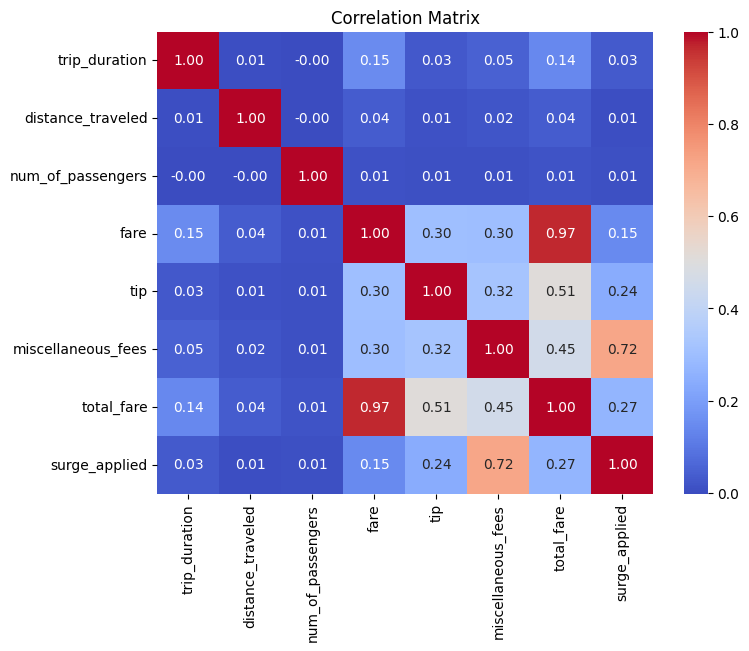

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()


# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Description

In [16]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
trip_duration,209673.0,1173.181478,4775.653621,0.00,446.00,707.00,1098.00,86387.00
distance_traveled,209673.0,5.054431,125.217419,0.02,1.95,3.20,5.73,57283.91
num_of_passengers,209673.0,1.292808,0.930754,0.00,1.00,1.00,1.00,9.00
fare,209673.0,99.623431,85.602702,0.00,52.50,75.00,116.25,4466.25
tip,209673.0,13.030824,20.367764,0.00,0.00,9.00,20.00,2500.00
miscellaneous_fees,209673.0,15.136829,12.553436,-0.50,6.00,9.75,26.45,435.00
total_fare,209673.0,127.791084,98.797374,0.00,70.20,101.70,152.25,4472.25
surge_applied,209673.0,0.280523,0.449256,0.00,0.00,0.00,1.00,1.00


### Histograms

In [ ]:
# Number of columns
num_cols = len(df.columns)

# Calculate grid size for subplots
rows = (num_cols // 4) + 1  # Adjust this as per your layout preference (4 columns per row)
cols = min(num_cols, 4)

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 8))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot each column's histogram
index = 0
for col_name, col_data in df.items():
    sns.histplot(col_data, ax=axs[index], kde=True, stat='density', linewidth=0)
    axs[index].set_title(col_name)
    index += 1

# Remove any extra axes
for ax in axs[index:]:
    ax.remove()

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
sns.pairplot(data=df,hue='surge_applied')
plt.show()

## Separate features and the target
This code separates the features (independent variables) and the target (dependent variable) from the dataset df:

X contains all the features of the dataset except for the price.
y contains only the price column, which is what you're trying to predict.

In [ ]:
y = df['surge_applied']
X = df.drop('surge_applied',axis=1)